In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.io import loadmat

In [2]:
X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [3]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (145, 145, 200)
y: (145, 145)


In [4]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

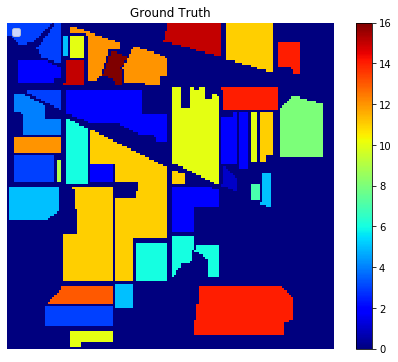

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(y, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.gca().legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13', '14', '15', '16'], loc='upper left')
#plt.savefig('ground_truth.png')
plt.show()

In [6]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [7]:
y = y.ravel()

In [8]:
print("X:", (X.shape))
print("y:", (y.shape))

X: (21025, 200)
y: (21025,)


In [9]:
label,counts=np.unique(y,return_counts=True)
print(label)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[10776    46  1428   830   237   483   730    28   478    20   972  2455
   593   205  1265   386    93]


In [10]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
scaler_model.fit(X.astype(float))
X=scaler_model.transform(X)

In [11]:
print(X.shape)
print(y.shape)

(21025, 200)
(21025,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25, stratify=y )

In [13]:
print(X_train.shape)
print(X_test.shape)

(15768, 200)
(5257, 200)


In [24]:
label_tr,counts_tr=np.unique(y_train,return_counts=True)
label_te,counts_te=np.unique(y_test,return_counts=True)
print(pd.DataFrame(counts_tr,label_tr))
print(pd.DataFrame(counts_te,label_te))

       0
0   8082
1     35
2   1071
3    622
4    178
5    362
6    547
7     21
8    358
9     15
10   729
11  1841
12   445
13   154
14   949
15   289
16    70
       0
0   2694
1     11
2    357
3    208
4     59
5    121
6    183
7      7
8    120
9      5
10   243
11   614
12   148
13    51
14   316
15    97
16    23


In [14]:
#Applying Scalar to train and test Dataset

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
#Appplying SVM 

from sklearn.svm import SVC
from sklearn import metrics

In [16]:
clf = SVC(C=25,gamma=0.001,decision_function_shape='ovo')

In [17]:
clf.fit(X_train, y_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics

In [20]:
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)

Accuracy : 78.77116225984402


In [21]:
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)

Cohen Kappa Score : 68.72855016019736


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2694
           1       0.75      0.27      0.40        11
           2       0.78      0.76      0.77       357
           3       0.86      0.54      0.66       208
           4       0.64      0.63      0.63        59
           5       0.93      0.61      0.74       121
           6       0.88      0.80      0.84       183
           7       1.00      0.57      0.73         7
           8       0.87      0.97      0.91       120
           9       0.00      0.00      0.00         5
          10       0.74      0.71      0.72       243
          11       0.74      0.82      0.78       614
          12       0.83      0.73      0.78       148
          13       0.94      0.98      0.96        51
          14       0.64      0.41      0.50       316
          15       0.00      0.00      0.00        97
          16       0.76      0.83      0.79        23

    accuracy              

C:\Users\THIS PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print(pd.DataFrame(mat))

       0  1    2    3   4   5    6  7    8  9   10   11   12  13   14  15  16
0   2398  5   33   29  12  47   36  3    3  5   38   80   34   1  187  93   4
1      0  3    0    0   0   0    0  0    1  0    0    0    0   0    0   0   0
2     50  0  270    6   4   0    0  0    0  0    3   14    0   0    0   0   0
3      7  0    2  112   5   0    0  0    0  0    0    3    1   0    0   0   0
4      8  0    1   10  37   0    0  0    0  0    0    0    2   0    0   0   0
5      5  0    0    0   0  74    0  0    0  0    0    0    0   0    1   0   0
6     20  0    0    0   1   0  147  0    0  0    0    0    0   0    0   0   0
7      0  0    0    0   0   0    0  4    0  0    0    0    0   0    0   0   0
8     15  3    0    0   0   0    0  0  116  0    0    0    0   0    0   0   0
9      0  0    0    0   0   0    0  0    0  0    0    0    0   0    0   0   0
10    27  0   22    0   0   0    0  0    0  0  173   12    1   0    0   0   0
11    72  0   28   47   0   0    0  0    0  0   29  502    2   0